# Simulating and verifying relationship between independent events and product of probabilites and dependent events and product of probabilities

For independent events:

These have been provided in the question. There are two sample sequences. And two events have been defined.

For dependent events, we had to define our own events.

For this, the following events have been defined.

Let a dice be rolled twice. Then


Event A: The first roll gave a one  - (1,1),(1,2),(1,3),(1,4),(1,5),(1,6)

Event B: The sum of the two rolls is 4 - (1,3),(3,1),(2,2)

P(A) = 6/36 = 1/6 = 0.166

P(B) = 3/36 = 1/12 = 0.0834

P(A^B) = 1/36 = 0.0278

P(A) * P(B) = 1/72 = 0.0138 not equal to P(A^B) because clearly these are dependent events.

In [64]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def calA(choice_f,sample_space,Iterations):
    ctr = 0
    for i in range(choice_f.size): 
        for j in range(sample_space.size):
            if choice_f[i] ==sample_space[j]:
                ctr+=1
    return ctr/Iterations

In [99]:
def calA_Dependent(choice_f,Iterations):
    ctr = 0
    for i in range(choice_f.size):
        if choice_f[i] == 1:
            ctr+=1
    return ctr/(Iterations)

In [100]:
def calB_Dependent(choice_f1,choice_f2,Iterations):
    ctr = 0
    for i in range(Iterations):
        if choice_f1[i] == 1 and choice_f2[i] == 3:
            ctr+=1
        elif choice_f1[i] == 3 and choice_f2[i] == 1:
            ctr+=1
        elif choice_f1[i] == 2 and choice_f2[i] == 2:
            ctr+=1
        else:
            continue
    return ctr/(Iterations)

In [101]:
def calAB_Dependent(choice_f1,choice_f2,Iterations):
    ctr = 0
    for i in range(Iterations):
        if choice_f1[i] == 1 and choice_f2[i] == 3:
            ctr+=1
        else:
            continue
    return ctr/(Iterations)

In [31]:
def calB(choice_f,sample_space,Iterations):
    ctr = 0
    for i in range(choice_f.size): 
        for j in range(sample_space.size):
            if choice_f[i] ==sample_space[j]:
                ctr+=1
    return ctr/Iterations

In [32]:
def calAB_inter(choice_f,sample_space,Iterations):
    ctr = 0
    for i in range(choice_f.size): 
        for j in range(sample_space.size):
            if choice_f[i] ==sample_space[j]:
                ctr+=1
    return ctr/Iterations

In [65]:
def checkIndependent(Iterations):
    Seq1 = np.array([2,4,6])
    Seq2 = np.array([1,2,3,4])
    Seq3 = np.array([2,4])
    choice = np.zeros(Iterations)
    for i in range(Iterations):
        choice[i]=random.randint(1,6)

    Pa = calA(choice,Seq1,Iterations)
    Pb = calB(choice,Seq2,Iterations)
    Pab = calAB_inter(choice,Seq3,Iterations)
    
    return Pa, Pb, Pab, Pa*Pb

In [95]:
def checkDependent(Iterations):
    Seq1 = np.array([1,2,3,4,5,6])
    choice1 = np.zeros(Iterations)    
    choice2 = np.zeros(Iterations)
    for i in range(Iterations):
        choice1[i] = random.randint(1,6)
        choice2[i] = random.randint(1,6)
    Pa = calA_Dependent(choice1,Iterations)
    Pb = calB_Dependent(choice1,choice2,Iterations)
    Pab = calAB_Dependent(choice1,choice2,Iterations)
    return Pa,Pb,Pab,Pa*Pb

For 1 trials, we have

P(A):  0.0
P(B):  0.0
P(AB):  0.0

P(A)*P(B):  0.0
For 10 trials, we have

P(A):  0.7
P(B):  0.6
P(AB):  0.4

P(A)*P(B):  0.42
For 50 trials, we have

P(A):  0.5
P(B):  0.58
P(AB):  0.3

P(A)*P(B):  0.29
For 100 trials, we have

P(A):  0.51
P(B):  0.66
P(AB):  0.34

P(A)*P(B):  0.3366
For 500 trials, we have

P(A):  0.51
P(B):  0.66
P(AB):  0.35

P(A)*P(B):  0.3366
For 1000 trials, we have

P(A):  0.499
P(B):  0.683
P(AB):  0.345

P(A)*P(B):  0.34081700000000004
For 5000 trials, we have

P(A):  0.4896
P(B):  0.6726
P(AB):  0.3312

P(A)*P(B):  0.32930496
For 10000 trials, we have

P(A):  0.4943
P(B):  0.6699
P(AB):  0.3287

P(A)*P(B):  0.33113157000000004
For 50000 trials, we have

P(A):  0.50064
P(B):  0.66818
P(AB):  0.33362

P(A)*P(B):  0.3345176352
For 100000 trials, we have

P(A):  0.49785
P(B):  0.6678
P(AB):  0.33243

P(A)*P(B):  0.33246422999999997


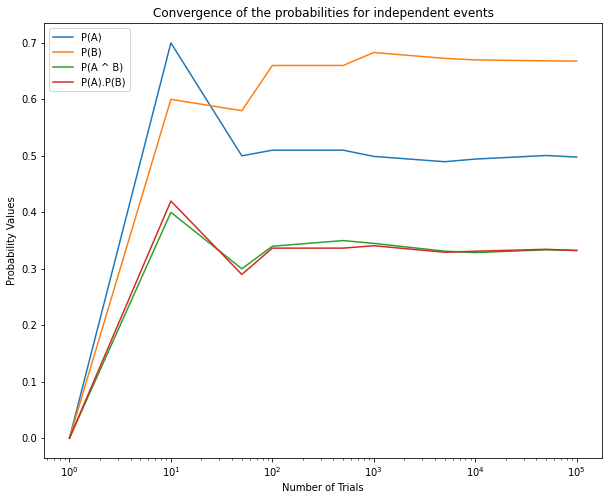

In [85]:
Tries = 10
Pa = np.zeros(Tries)
Pb = np.zeros(Tries)
Pab = np.zeros(Tries)
P_check = np.zeros(Tries)
Iterations = np.array([1,10,50,100,500,1000,5000,10000,50000,100000])
for i in range(Tries):
    Pa[i],Pb[i],Pab[i],P_check[i] = checkIndependent(Iterations[i])
    print("For " + (str)(Iterations[i]) + " trials, we have")
    print("\nP(A): ",Pa[i])
    print("P(B): ",Pb[i])
    print("P(AB): ",Pab[i])
    print("\nP(A)*P(B): ",P_check[i])
plt.figure(figsize=(10,8))
plt.plot(Iterations,Pa,label = "P(A)")
plt.plot(Iterations,Pb,label = "P(B)")
plt.plot(Iterations,Pab,label = "P(A ^ B)")
plt.plot(Iterations,P_check,label = "P(A).P(B)")
plt.legend()
plt.title("Convergence of the probabilities for independent events")
plt.xlabel("Number of Trials")
plt.ylabel("Probability Values")
plt.xscale("log")
#plt.yscale("log")
plt.show()


For 1 trials, we have

P(A):  0.0
P(B):  0.0
P(AB):  0.0

P(A)*P(B):  0.0

For 10 trials, we have

P(A):  0.2
P(B):  0.0
P(AB):  0.0

P(A)*P(B):  0.0

For 50 trials, we have

P(A):  0.12
P(B):  0.06
P(AB):  0.02

P(A)*P(B):  0.0072

For 100 trials, we have

P(A):  0.16
P(B):  0.1
P(AB):  0.01

P(A)*P(B):  0.016

For 500 trials, we have

P(A):  0.148
P(B):  0.088
P(AB):  0.03

P(A)*P(B):  0.013023999999999999

For 1000 trials, we have

P(A):  0.174
P(B):  0.085
P(AB):  0.029

P(A)*P(B):  0.01479

For 5000 trials, we have

P(A):  0.1802
P(B):  0.0834
P(AB):  0.0318

P(A)*P(B):  0.01502868

For 10000 trials, we have

P(A):  0.1729
P(B):  0.0831
P(AB):  0.0285

P(A)*P(B):  0.014367989999999999

For 50000 trials, we have

P(A):  0.17138
P(B):  0.0858
P(AB):  0.02914

P(A)*P(B):  0.014704404

For 100000 trials, we have

P(A):  0.16806
P(B):  0.08446
P(AB):  0.02885

P(A)*P(B):  0.014194347599999997


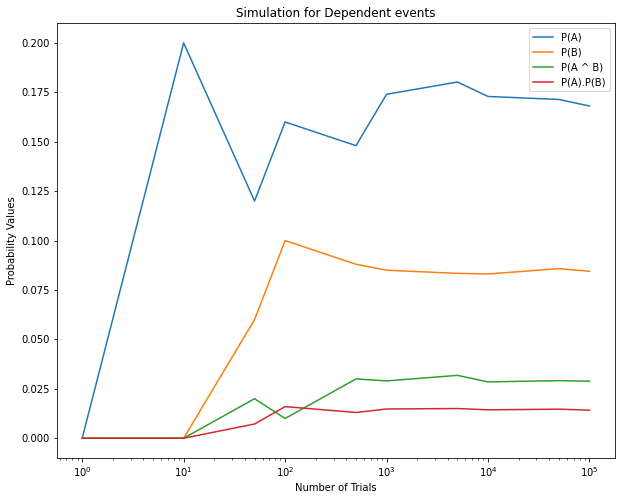

In [106]:
#Checking for dependent events
#Event A: The first dice gets a 1 - (1,1)(1,2),(1,3)...(1,6) = 1/6
#Event B: The sum of the numbers on two dice is 4 - (1,3),(3,1),(2,2) = 3/36 = 1/12
#A ^ B: First number is A and sum is 4 - (1,3) = 1/36
Tries = 10
Pa = np.zeros(Tries)
Pb = np.zeros(Tries)
Pab = np.zeros(Tries)
P_check = np.zeros(Tries)
Iterations = np.array([1,10,50,100,500,1000,5000,10000,50000,100000])
for i in range(Tries):
    Pa[i],Pb[i],Pab[i],P_check[i] = checkDependent(Iterations[i])
    print("\nFor " + (str)(Iterations[i]) + " trials, we have")
    print("\nP(A): ",Pa[i])
    print("P(B): ",Pb[i])
    print("P(AB): ",Pab[i])
    print("\nP(A)*P(B): ",P_check[i])
plt.figure(figsize=(10,8))
plt.plot(Iterations,Pa,label = "P(A)")
plt.plot(Iterations,Pb,label = "P(B)")
plt.plot(Iterations,Pab,label = "P(A ^ B)")
plt.plot(Iterations,P_check,label = "P(A).P(B)")
plt.legend()
plt.title("Simulation for Dependent events")
plt.xlabel("Number of Trials")
plt.ylabel("Probability Values")
plt.xscale("log")
#plt.yscale("log")
plt.show()

